In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os


In [15]:
# Path to the folder where files are located
folder_path = "C:\\Users\\Ghost\\Downloads\\Compressed\\yfinance_data\\yfinance_data"

In [20]:
print("Files in the folder:")
print(os.listdir(folder_path))

Files in the folder:
['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']


In [26]:
# Initialize an empty list to store DataFrames
dataframes = []

In [32]:
# Loop through the folder and load Excel files
for file in os.listdir(folder_path):
    if file.endswith(".csv") or file.endswith(".csv"):  # Only Excel files
        file_path = os.path.join(folder_path, file)
        stock_name = file.split("_")[0]  # Extract stock name for labeling
        df = pd.read_csv(file_path)  # Load file
        df['Stock'] = stock_name  # Add a column for stock name
        dataframes.append(df)

In [33]:
# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


In [34]:
print(combined_df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Stock  
0        0.0           0.0  AAPL  
1        0.0           0.0  AAPL  
2        0.0           0.0  AAPL  
3        0.0           0.0  AAPL  
4        0.0           0.0  AAPL  


In [35]:
combined_df.to_csv("combined_stock_data.csv", index=False)

In [36]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

# Handle missing values (either fill or drop)
df.fillna(method='ffill', inplace=True)  # Forward fill missing data
# Or drop rows with missing values
# df.dropna(inplace=True)


Missing values per column:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Stock           0
dtype: int64


C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2809519830.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing data


In [37]:
# Check data types
print("Data types:\n", df.dtypes)

# Rename columns if necessary (e.g., "Adj Close" to "Close")
df.rename(columns={"Adj Close": "Close"}, inplace=True)


Data types:
 Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
Stock            object
dtype: object


In [38]:
# Get descriptive statistics
print(df.describe())


              Open         High          Low        Close        Close  \
count  3545.000000  3545.000000  3545.000000  3545.000000  3545.000000   
mean     75.505658    77.159237    73.743492    75.487264    75.487264   
std     102.530489   104.806516   100.051787   102.456615   102.456615   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.516667    11.861333    11.216667    11.565333    11.565333   
50%      17.463333    17.688667    17.100000    17.459333    17.459333   
75%     161.880005   165.333328   158.360001   161.479996   161.479996   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  Dividends  Stock Splits  
count  3.545000e+03     3545.0   3545.000000  
mean   9.699708e+07        0.0      0.002257  
std    7.866828e+07        0.0      0.097921  
min    1.777500e+06        0.0      0.000000  
25%    4.770600e+07        0.0      0.000000  
50%    8.250600e+07        0.0      0.000000  
75% 

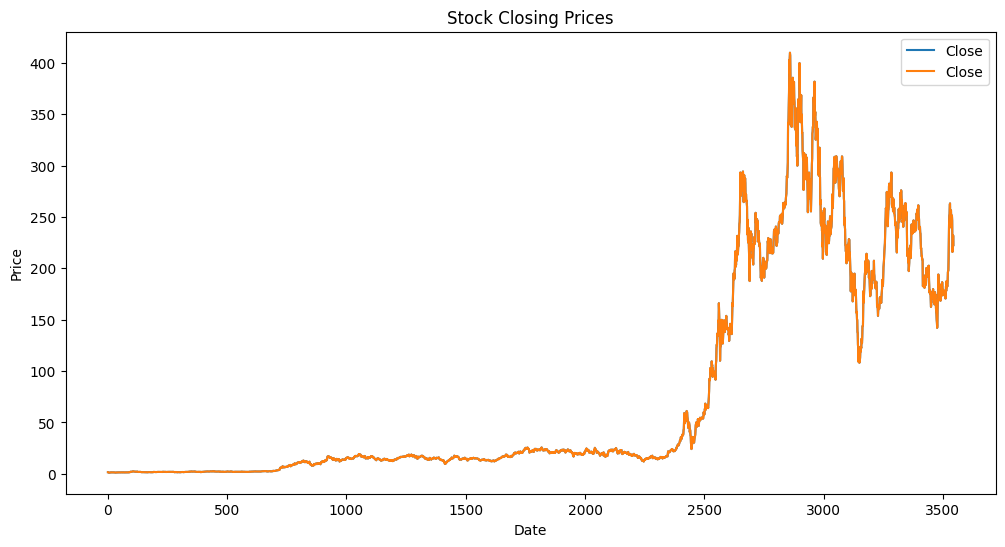

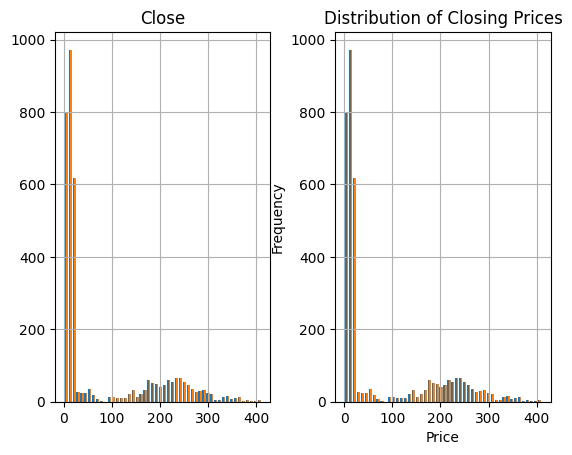

In [39]:
import matplotlib.pyplot as plt

# Plot closing prices
df['Close'].plot(figsize=(12, 6))
plt.title("Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Histogram of closing prices
df['Close'].hist(bins=50)
plt.title("Distribution of Closing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [44]:
import talib

# Example: Analyze a specific stock's data
aapl_data = combined_df[combined_df['Stock'] == 'AAPL']

# Ensure columns are in correct format
aapl_data['SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)  # Simple Moving Average
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)     # Relative Strength Index
aapl_data['MACD'], _, _ = talib.MACD(aapl_data['Close'], 
                                     fastperiod=12, 
                                     slowperiod=26, 
                                     signalperiod=9)                # MACD

# Display the results
print(aapl_data[['Date', 'Close', 'SMA_20', 'RSI', 'MACD']].head())


         Date     Close  SMA_20  RSI  MACD
0  1980-12-12  0.128348     NaN  NaN   NaN
1  1980-12-15  0.121652     NaN  NaN   NaN
2  1980-12-16  0.112723     NaN  NaN   NaN
3  1980-12-17  0.115513     NaN  NaN   NaN
4  1980-12-18  0.118862     NaN  NaN   NaN


C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\1857962270.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)  # Simple Moving Average
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\1857962270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)     # Relative Strength Index
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\1857962270.py:9: SettingWithCopyWarning: 
A value 

In [45]:
import talib
import pandas as pd

# Assuming 'aapl_data' is your DataFrame
# Use .loc[] to safely modify the columns

# Calculate technical indicators
aapl_data.loc[:, 'SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)  # Simple Moving Average
aapl_data.loc[:, 'RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)      # Relative Strength Index
aapl_data.loc[:, 'MACD'], _, _ = talib.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)  # MACD

# Check the result
print(aapl_data.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Stock  SMA_20  RSI  MACD  
0        0.0           0.0  AAPL     NaN  NaN   NaN  
1        0.0           0.0  AAPL     NaN  NaN   NaN  
2        0.0           0.0  AAPL     NaN  NaN   NaN  
3        0.0           0.0  AAPL     NaN  NaN   NaN  
4        0.0           0.0  AAPL     NaN  NaN   NaN  


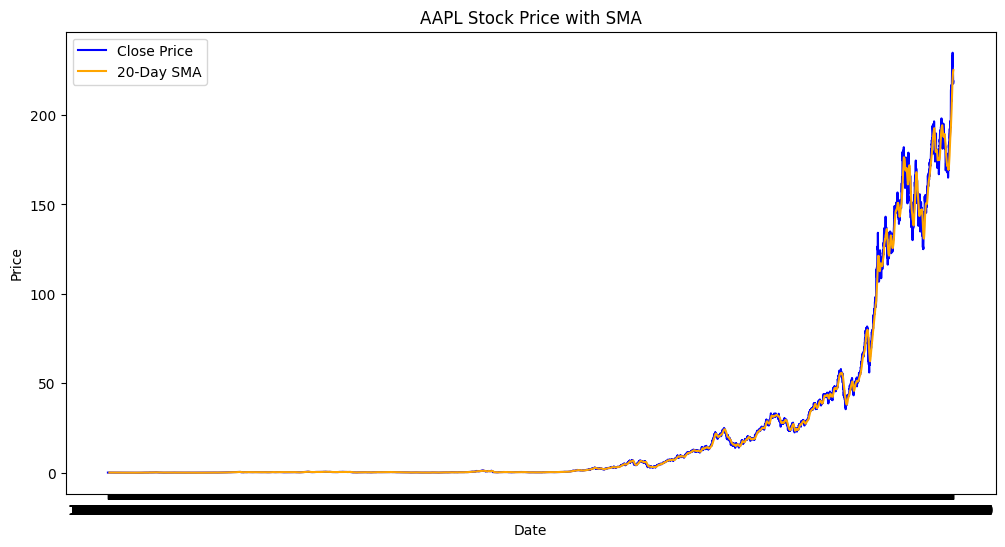

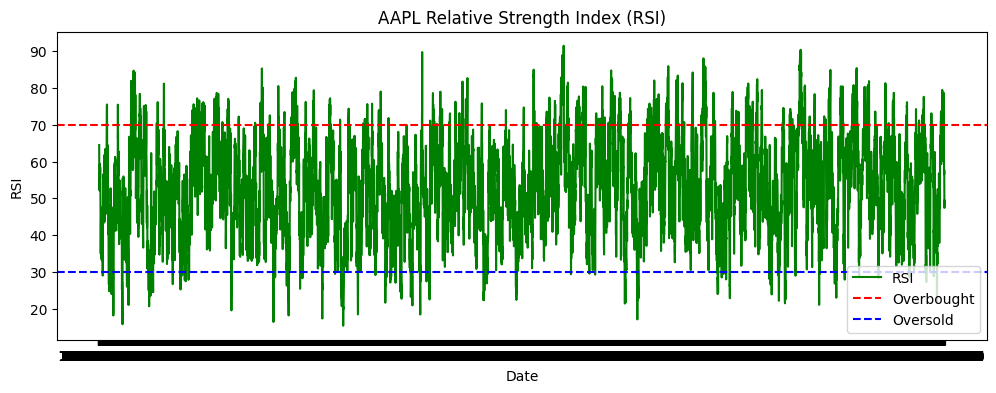

In [46]:
import matplotlib.pyplot as plt

# Plot stock price and moving average
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='Close Price', color='blue')
plt.plot(aapl_data['Date'], aapl_data['SMA_20'], label='20-Day SMA', color='orange')

plt.title("AAPL Stock Price with SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(aapl_data['Date'], aapl_data['RSI'], label='RSI', color='green')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='blue', linestyle='--', label='Oversold')

plt.title("AAPL Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


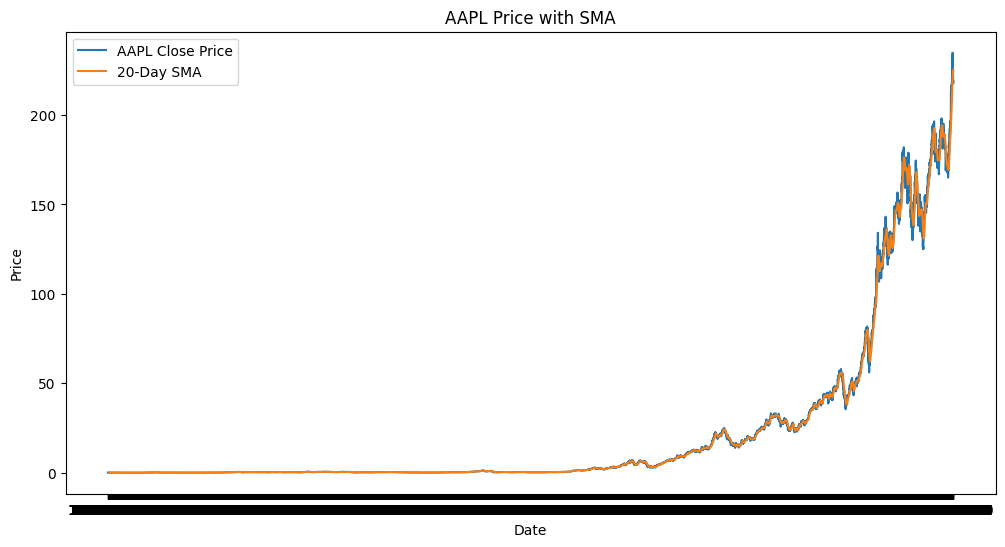

C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


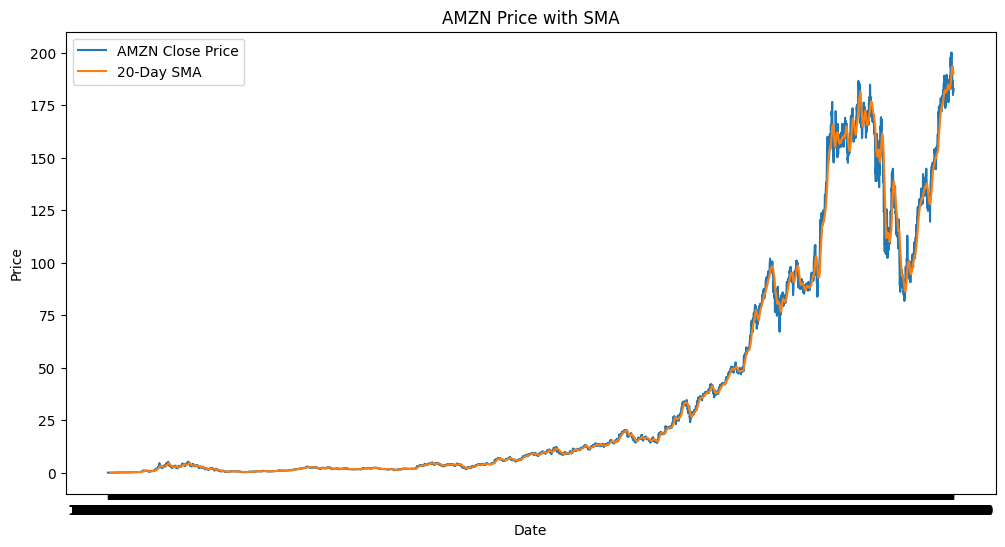

C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


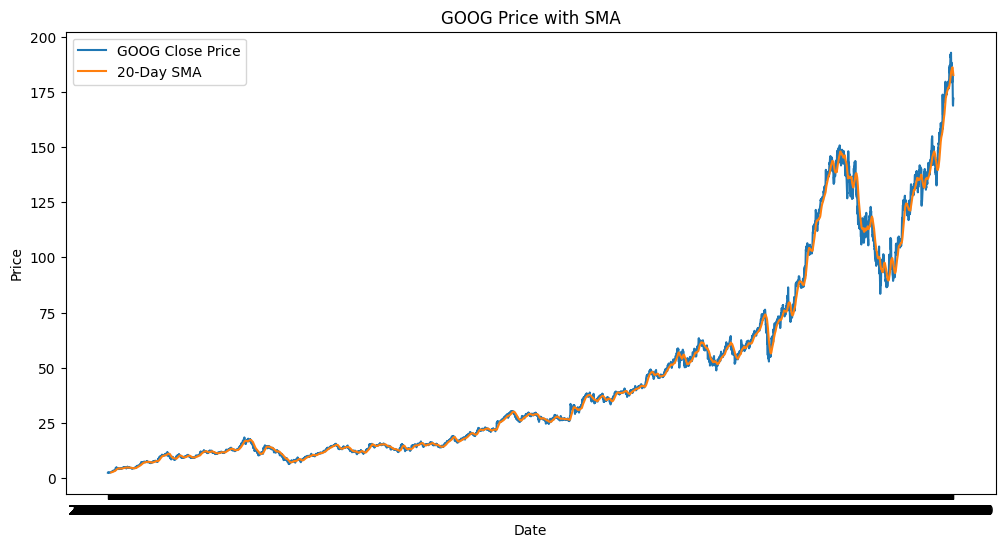

C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


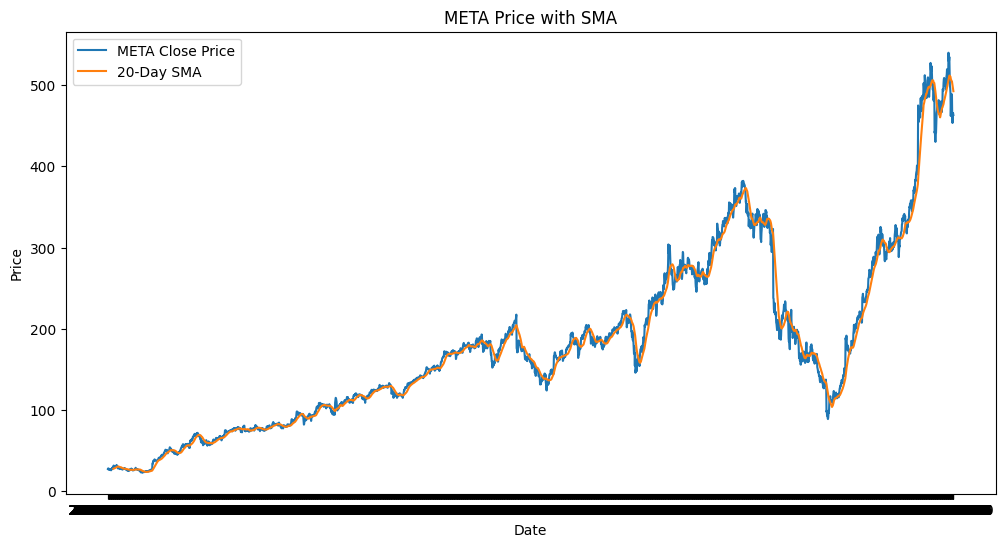

C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


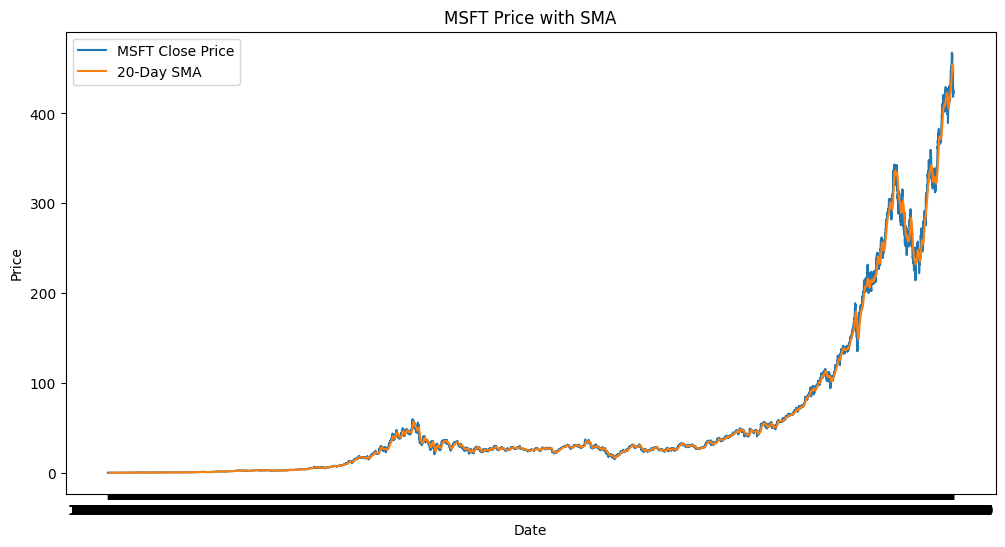

C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


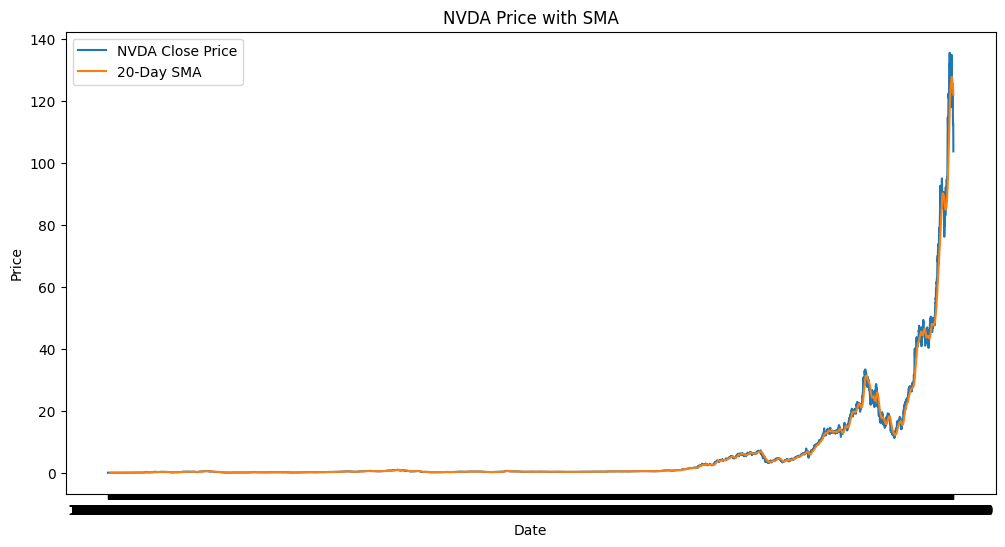

C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\2815012576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)


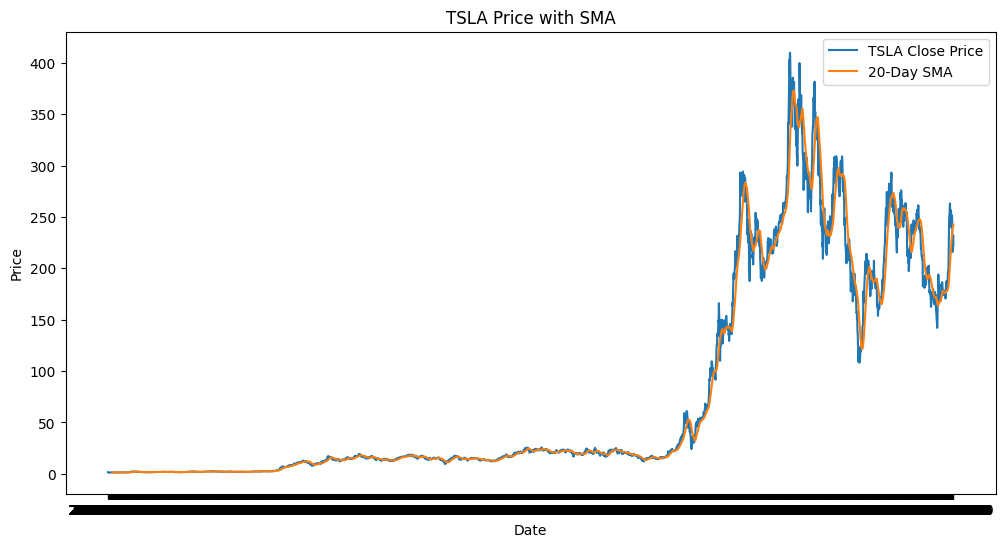

In [47]:
stocks = combined_df['Stock'].unique()

for stock in stocks:
    stock_data = combined_df[combined_df['Stock'] == stock]
    
    # Apply indicators
    stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
    stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
    
    # Plot for each stock
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{stock} Close Price")
    plt.plot(stock_data['Date'], stock_data['SMA_20'], label="20-Day SMA")
    plt.title(f"{stock} Price with SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


In [48]:
pip install pynance



   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------------------

In [54]:
pip install yfinance



     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/948.2 kB 397.0 kB/s eta 0:00:02
     ------------------- ---------------- 524.3/948.2 kB 397.0 kB/s eta 0:00:02
     ----------------------------- ------ 786.4/948.2 kB 548.5 kB/s eta 0:00:01
     ------------------------------------ 948.2/948.2 kB 611.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finish

In [55]:
import yfinance as yf

# Fetch stock data for AAPL
stock_data = yf.download('AAPL', start='2000-01-01')

# Calculate daily returns
stock_data['Returns'] = stock_data['Close'].pct_change()

# Display the first few rows
print(stock_data[['Close', 'Returns']].head())


[*********************100%***********************]  1 of 1 completed

Price          Close   Returns
Ticker          AAPL          
Date                          
2000-01-03  0.999442       NaN
2000-01-04  0.915179 -0.084310
2000-01-05  0.928571  0.014633
2000-01-06  0.848214 -0.086538
2000-01-07  0.888393  0.047369


In [50]:
import pandas as pd
import pynance as pn

# Assuming aapl_data['Close'] contains the closing prices
aapl_data['Returns'] = aapl_data['Close'].pct_change()

# Display the calculated returns
print(aapl_data[['Date', 'Close', 'Returns']].head())



         Date     Close   Returns
0  1980-12-12  0.128348       NaN
1  1980-12-15  0.121652 -0.052171
2  1980-12-16  0.112723 -0.073398
3  1980-12-17  0.115513  0.024751
4  1980-12-18  0.118862  0.028992


C:\Users\Ghost\AppData\Local\Temp\ipykernel_16468\3975137598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data['Returns'] = aapl_data['Close'].pct_change()


[*********************100%***********************]  1 of 1 completed


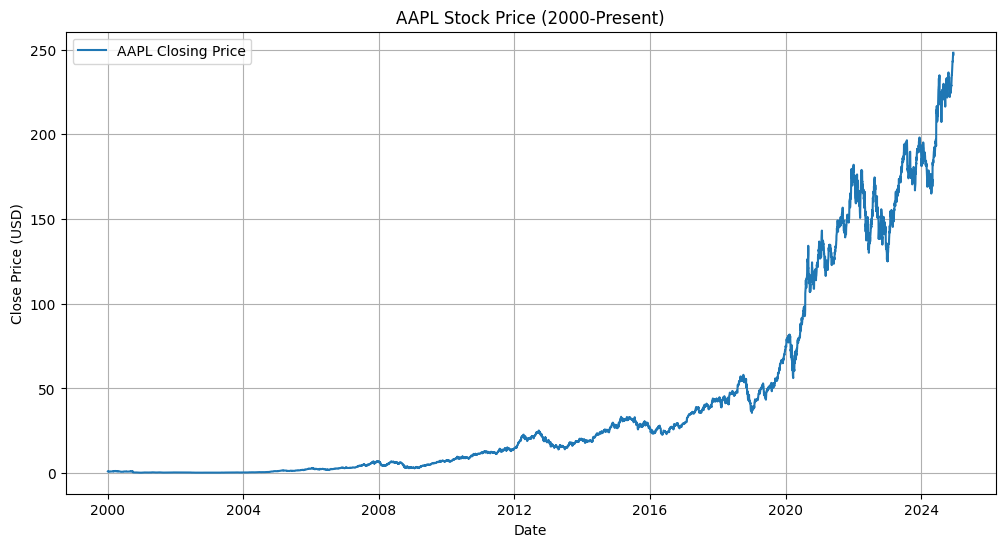

In [56]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data for AAPL from Yahoo Finance
stock_data = yf.download('AAPL', start='2000-01-01')

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='AAPL Closing Price')
plt.title('AAPL Stock Price (2000-Present)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


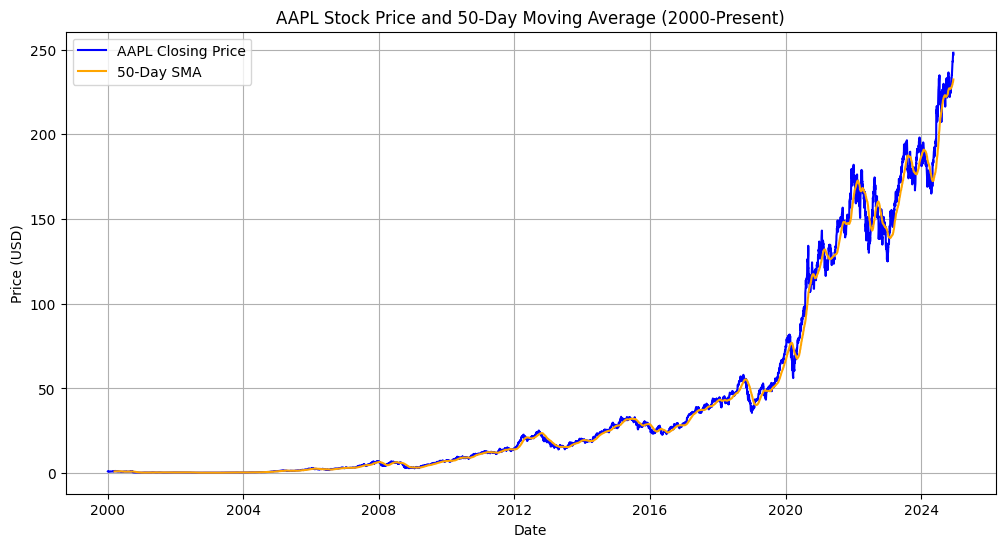

In [57]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data for AAPL
stock_data = yf.download('AAPL', start='2000-01-01')

# Calculate 50-period Simple Moving Average (SMA) and add to stock data
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Plot the closing price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='AAPL Closing Price', color='blue')
plt.plot(stock_data['SMA_50'], label='50-Day SMA', color='orange')
plt.title('AAPL Stock Price and 50-Day Moving Average (2000-Present)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


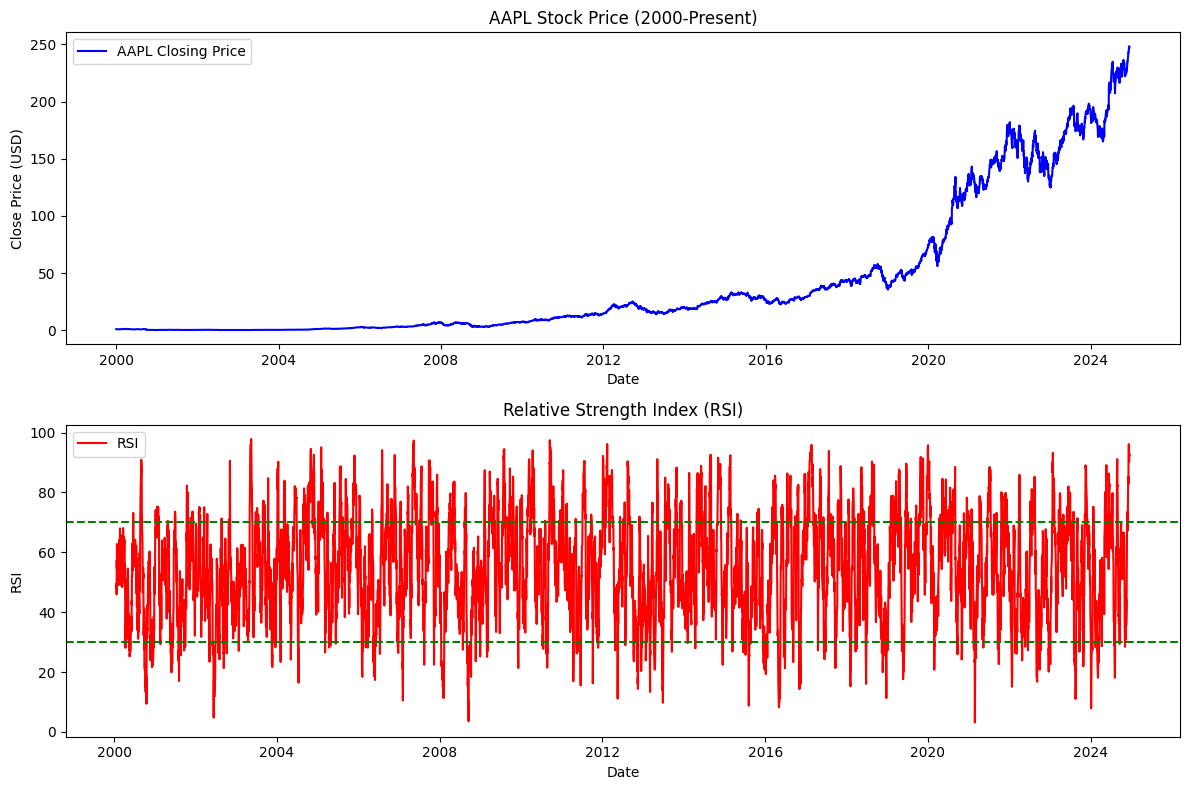

In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data for AAPL
stock_data = yf.download('AAPL', start='2000-01-01')

# Calculate the 14-day Relative Strength Index (RSI)
delta = stock_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Plot the Closing Price and RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the closing price
ax1.plot(stock_data['Close'], label='AAPL Closing Price', color='blue')
ax1.set_title('AAPL Stock Price (2000-Present)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)')
ax1.legend()

# Plot the RSI
ax2.plot(stock_data['RSI'], label='RSI', color='red')
ax2.axhline(y=70, color='green', linestyle='--')
ax2.axhline(y=30, color='green', linestyle='--')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


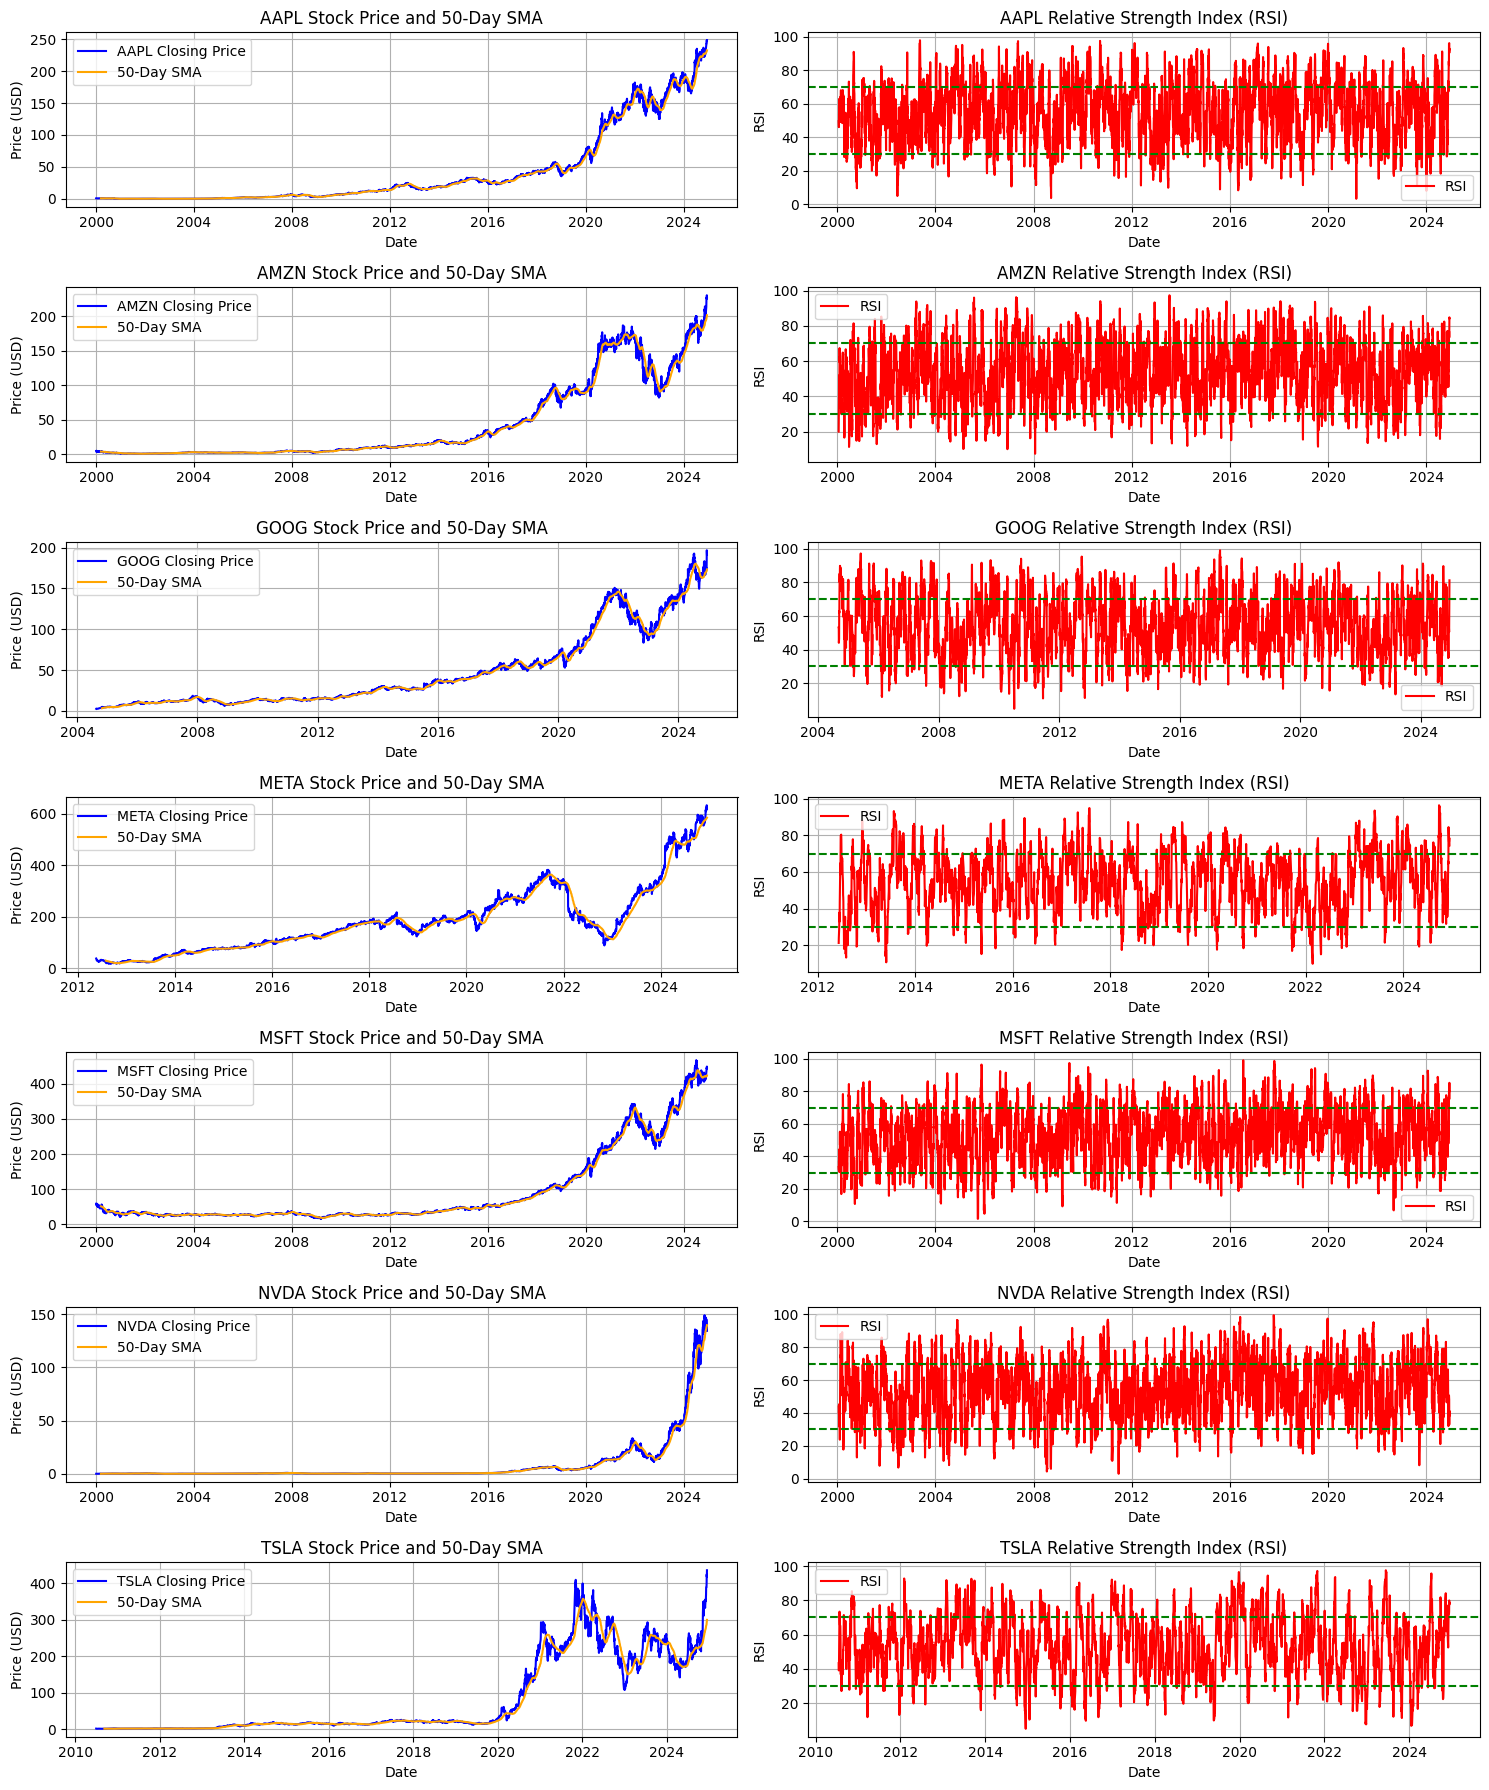

In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbols
symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Create an empty dictionary to store stock data
stocks_data = {}

# Fetch stock data for each symbol and store it in the dictionary
for symbol in symbols:
    stocks_data[symbol] = yf.download(symbol, start='2000-01-01')

# Plotting
fig, axs = plt.subplots(7, 2, figsize=(15, 18))

# Loop through the stock data for each symbol
for i, symbol in enumerate(symbols):
    stock_data = stocks_data[symbol]
    
    # Calculate the 50-day Simple Moving Average (SMA)
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    
    # Calculate the 14-day Relative Strength Index (RSI)
    delta = stock_data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))
    
    # Plot the closing price and SMA in the first column
    axs[i, 0].plot(stock_data['Close'], label=f'{symbol} Closing Price', color='blue')
    axs[i, 0].plot(stock_data['SMA_50'], label='50-Day SMA', color='orange')
    axs[i, 0].set_title(f'{symbol} Stock Price and 50-Day SMA')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Price (USD)')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    
    # Plot the RSI in the second column
    axs[i, 1].plot(stock_data['RSI'], label='RSI', color='red')
    axs[i, 1].axhline(y=70, color='green', linestyle='--')
    axs[i, 1].axhline(y=30, color='green', linestyle='--')
    axs[i, 1].set_title(f'{symbol} Relative Strength Index (RSI)')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('RSI')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()
